# Recursion

#### Review 1

- Why does Python have the complexity of separate references and objects?
- Why not follow the original organization we saw for everything (i.e., boxes of data with labels)?
    - Reason 1: Performance
    - Reason 2: Centralized Updates

In [ ]:
# Reason 1: Performance
# Try this example in PythonTutor

x = "this string is millions of characters" + "!" * (10 ** 6)
y = x # this is fast! Why? 
      # Answer: Recall that assignment just creates a reference copy

In [ ]:
# Reason 2: Centralized Updates

# Try this example in PythonTutor
alice = {"name":"Alice", "score":10, "age":30}
bob = {"name":"Bob", "score":8, "age":25}
winner = alice

alice["age"] += 1
print("Winner age:", winner["age"]) 
# what line 9 will output?
# Answer: 31

#### Review 2

Assignment creates reference copy immaterial of whether it is into a variable or into another data structure. Recall that references can be stored either in a variable or inside object instances for other data structures.

In [ ]:
# Try this example in PythonTutor

alice = {"name":"Alice", "score":10, "age":30}
bob = {"name":"Bob", "score":8, "age":25}
team = [alice, bob]              
# TODO: discuss does this create new inner dictionaries?
# Answer: this line only create a new object for outer 
# list, which directly stores references to existing
# dictionary object instances

players = {"A": alice, "B": bob} 
# TODO: discuss does this create new inner dictionaries?
# Answer: this line only create a new object for outer 
# dictionary, which directly stores references to 
# existing dictionary object instances

#### Review 3

In [ ]:
# Use 'in' to determine if the given thing is in my_list
my_list = ["meet", "me", "after", "2:00pm"]
print("me" in my_list)       # TODO: predict the output
print("Meena" in my_list)    # TODO: predict the output

In [ ]:
# Let's try a nested list
my_list = [11, "meet", ["me", "them", "us"],  [84, 19, 22], "school", 2.54]
print("me" in my_list)       # TODO: predict the output
print(84 in my_list)         # TODO: predict the output
print(11 in my_list)         # TODO: predict the output

#### Warmup 1

In [ ]:
def search_list_depth2(target, some_list):
    ''' returns True if thing in some_list, False otherwise'''
    for thing in some_list:
        #print(thing, type(thing))
        if type(thing) != list:
            if target == thing:
                return True
            else:
                continue # do we need this?
        else: # its a list
            if target in thing:
                return True
            else:
                continue # do we need this?
                
    return False  # after all possible searching....not found

print(my_list)
print(search_list_depth2("school", my_list))  # in list
print(search_list_depth2(22, my_list))        # in nested list
print(search_list_depth2("house", my_list))   # not anywhere

#### Warmup 2

In [ ]:
list_3_deep = [22, [33, 44, [55, 66], 77], 88]

# let's try it our previous function
print(search_list_depth2(22, list_3_deep))  # in list
print(search_list_depth2(99, list_3_deep))  # not in list

# write other tests to be sure that it works
print(search_list_depth2(33, list_3_deep))  # in nested list
print(search_list_depth2(55, list_3_deep))  # in nested nested list

In [ ]:
# what about ANY depth list? 
# that is the goal of today's lecture

## Learning Objectives

After today's Lecture you will be able to: 

Define recursion and be able to identify
- base case
- recursive case
- infinite recursion

Explain why the following can be recursively defined
- lists
- dictionaries

Trace a recursive function
- involving numeric computation
- involving nested data structures

<div>
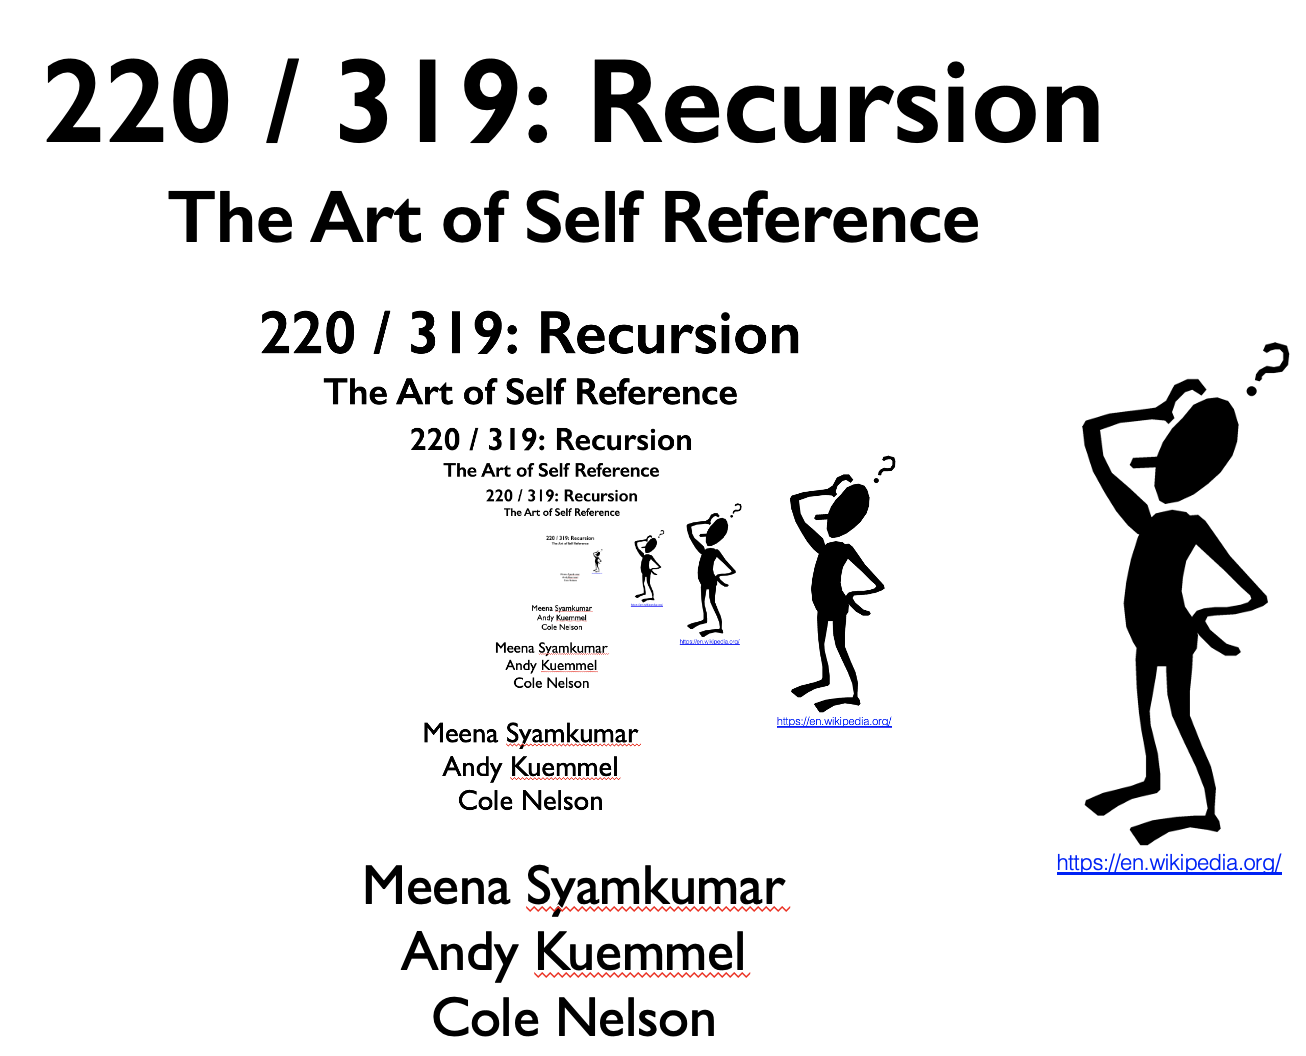
</div>

#### Recursion is defined as the process of defining something in terms of itself.

**Good example:**

*Hofstadter's Law*: “It always takes longer than you expect, even when you take into account *Hofstadter's Law*.” (From Gödel, Escher, Bach)

**Unhelpful self-reference example:**

*mountain*: “a landmass that projects conspicuously above its surroundings and is higher than a *hill*”

*hill*: “a usually rounded natural elevation of land lower than a *mountain*”
(From Merriam-Webster dictionary)

**Mathematical example:**

A number x is a *positive even number* if:
- x is 2 or
- x equals another *positive even number* plus two

<div>
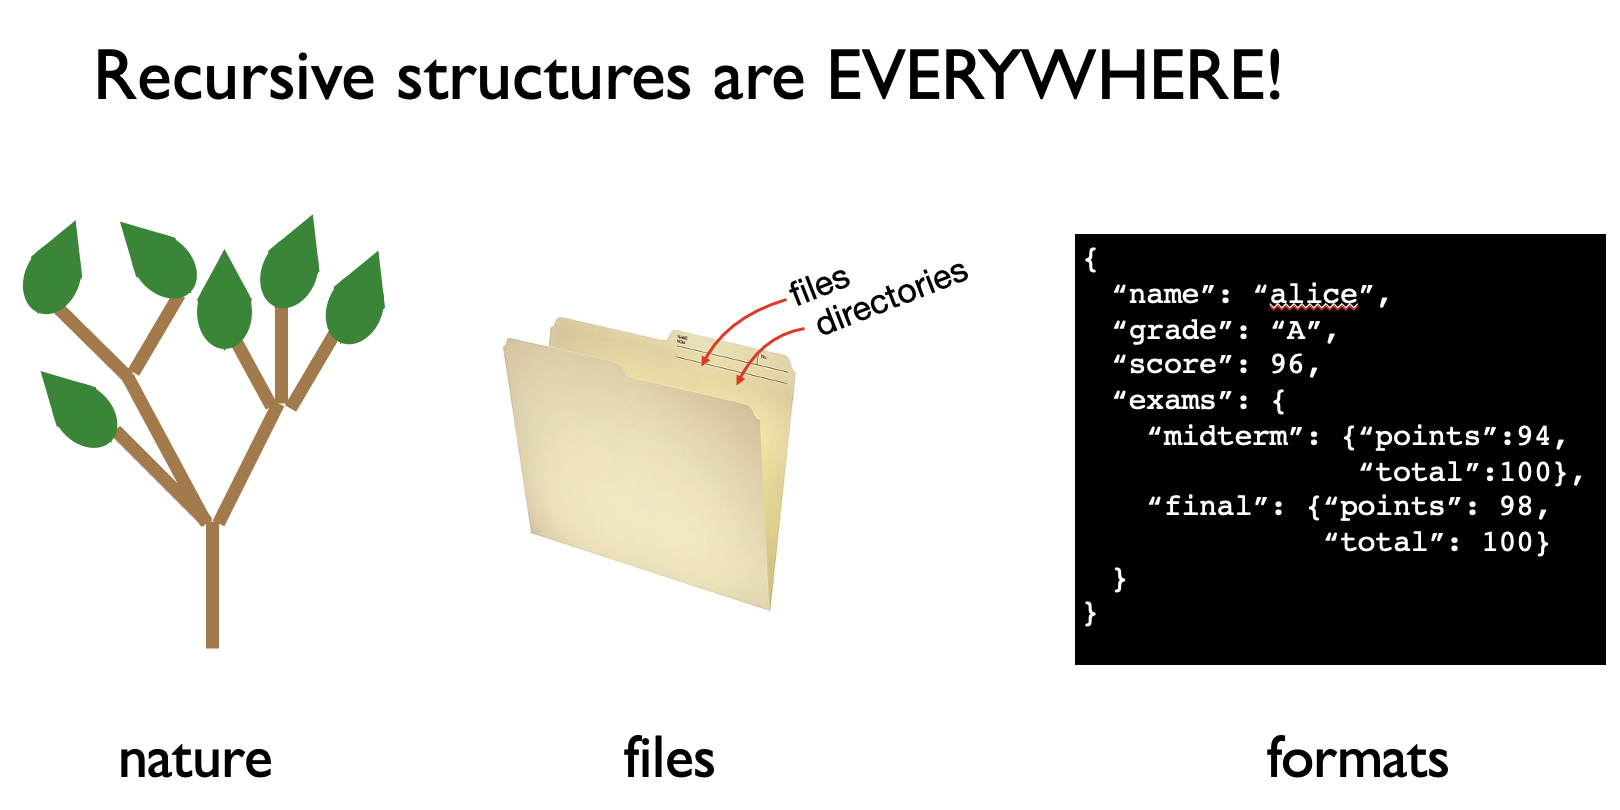
</div>

**Term**: branch

**Definition**: wooden stick, with an end splitting into other *branches*, OR terminating with a leaf


<div>
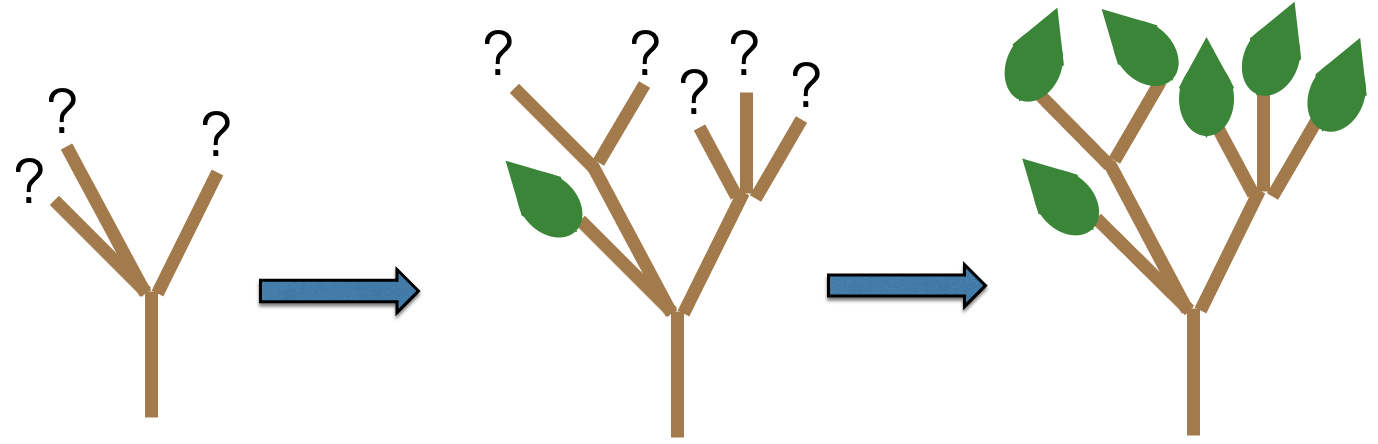
</div>

<div>
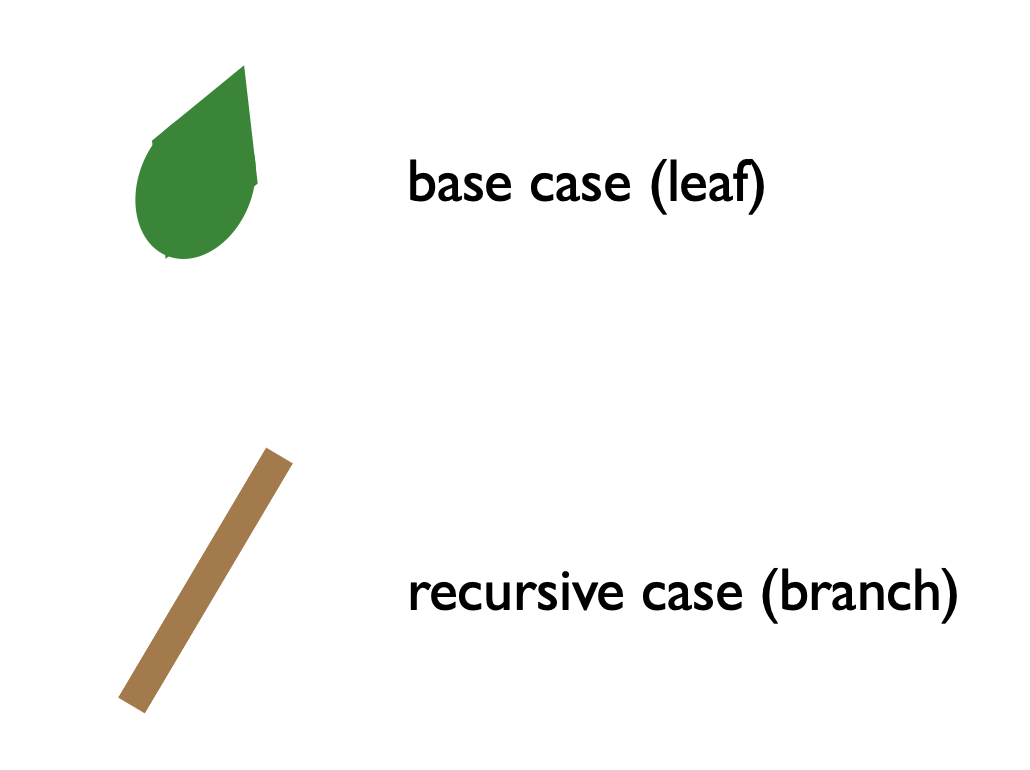
</div>

**Term**: directory

**Definition**: a collection of files and *directories*
    
<div>
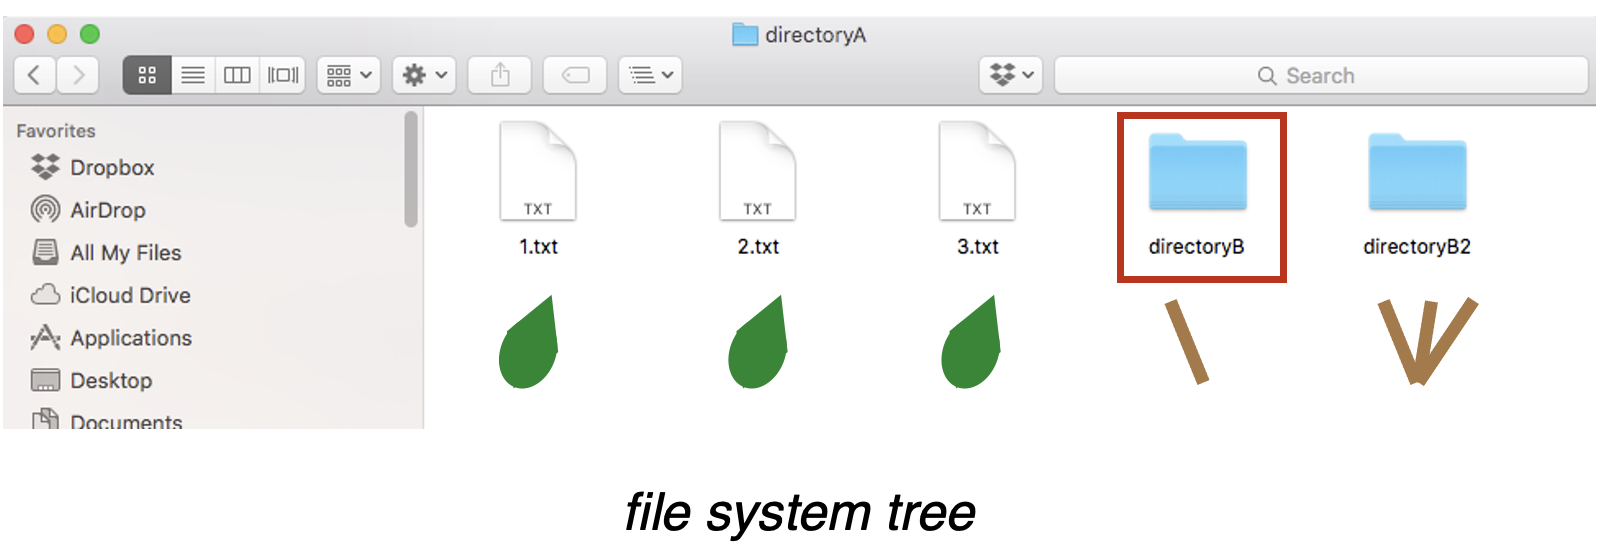
</div>    

### Define recursion and be able to identify 
- base case
- recursive case
- infinite recursion

### Factorial of a number

### Goal: work from examples to get to recursive code

#### Step 1: Come up with examples

```python
1! = 1
2! = 1*2 = 2
3! = 1*2*3 = 6
4! = 1*2*3*4 = 24
5! = 1*2*3*4*5 = 120
```

#### Step 2: Identify self-reference
```python
1! =  # don't need a pattern at the start
2! = 
3! = 
4! = 
5! = 
```

#### Step 3: Recursive definition
```python
1! is ???
N! is ??? for N > 1
```

#### Step 4: Convert to Python code
- **Rule 1**: Base case should always be defined and be terminal
- **Rule 2**: Recursive case should make progress towards base case

In [ ]:
def fact(n):
    if n == 1:
        return 1
    p = fact(n-1)                                   
    return n * p

### How does Python keep all the variables separate?
- Frames

<div>
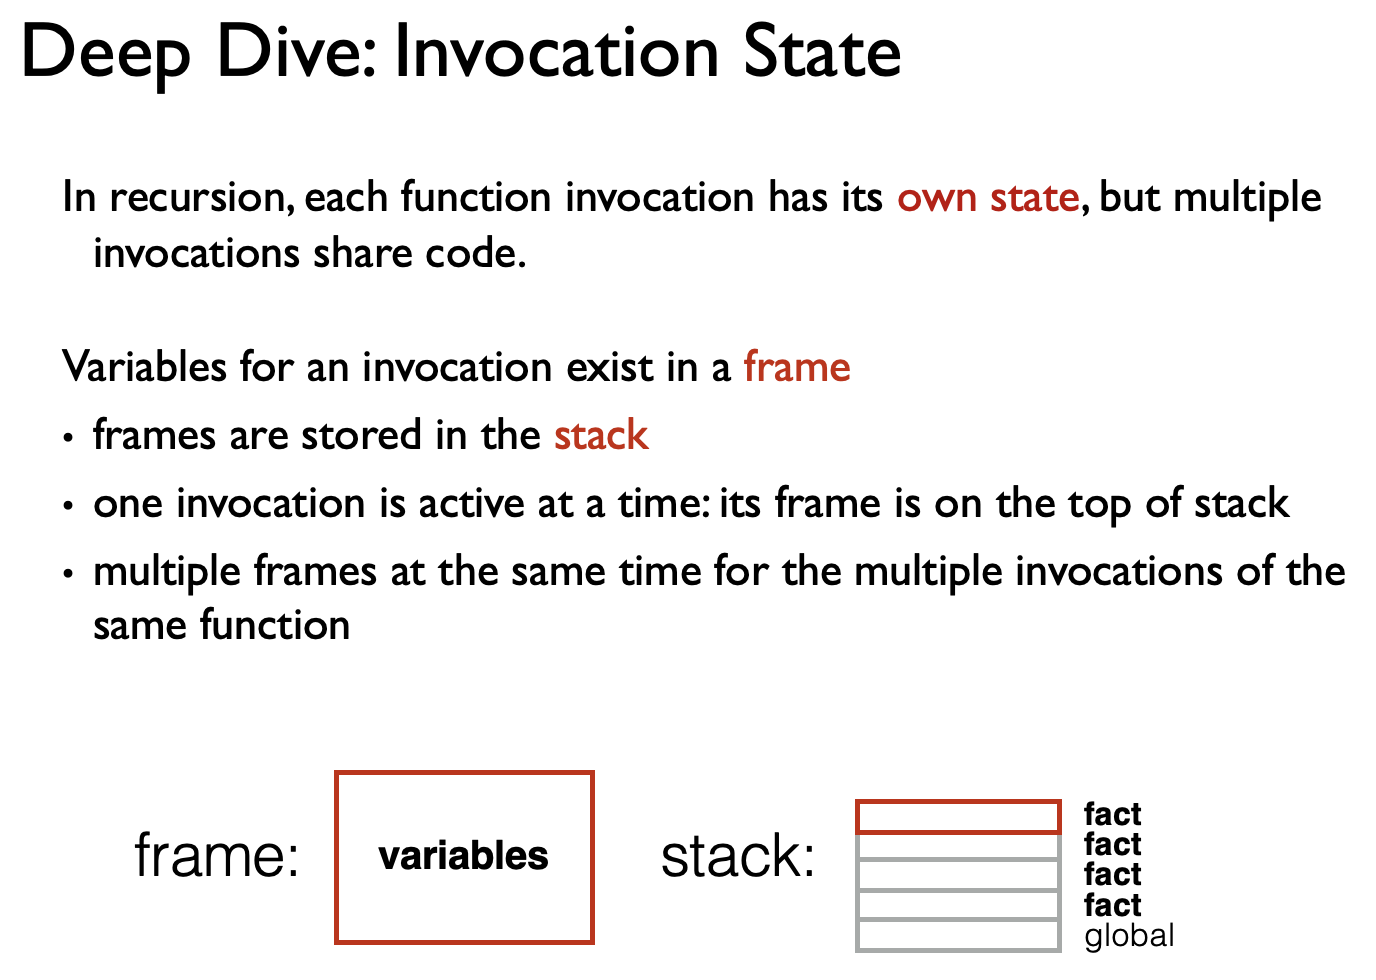
</div> 

In [ ]:
# Try this in PythonTutor
fact(3)

<div>
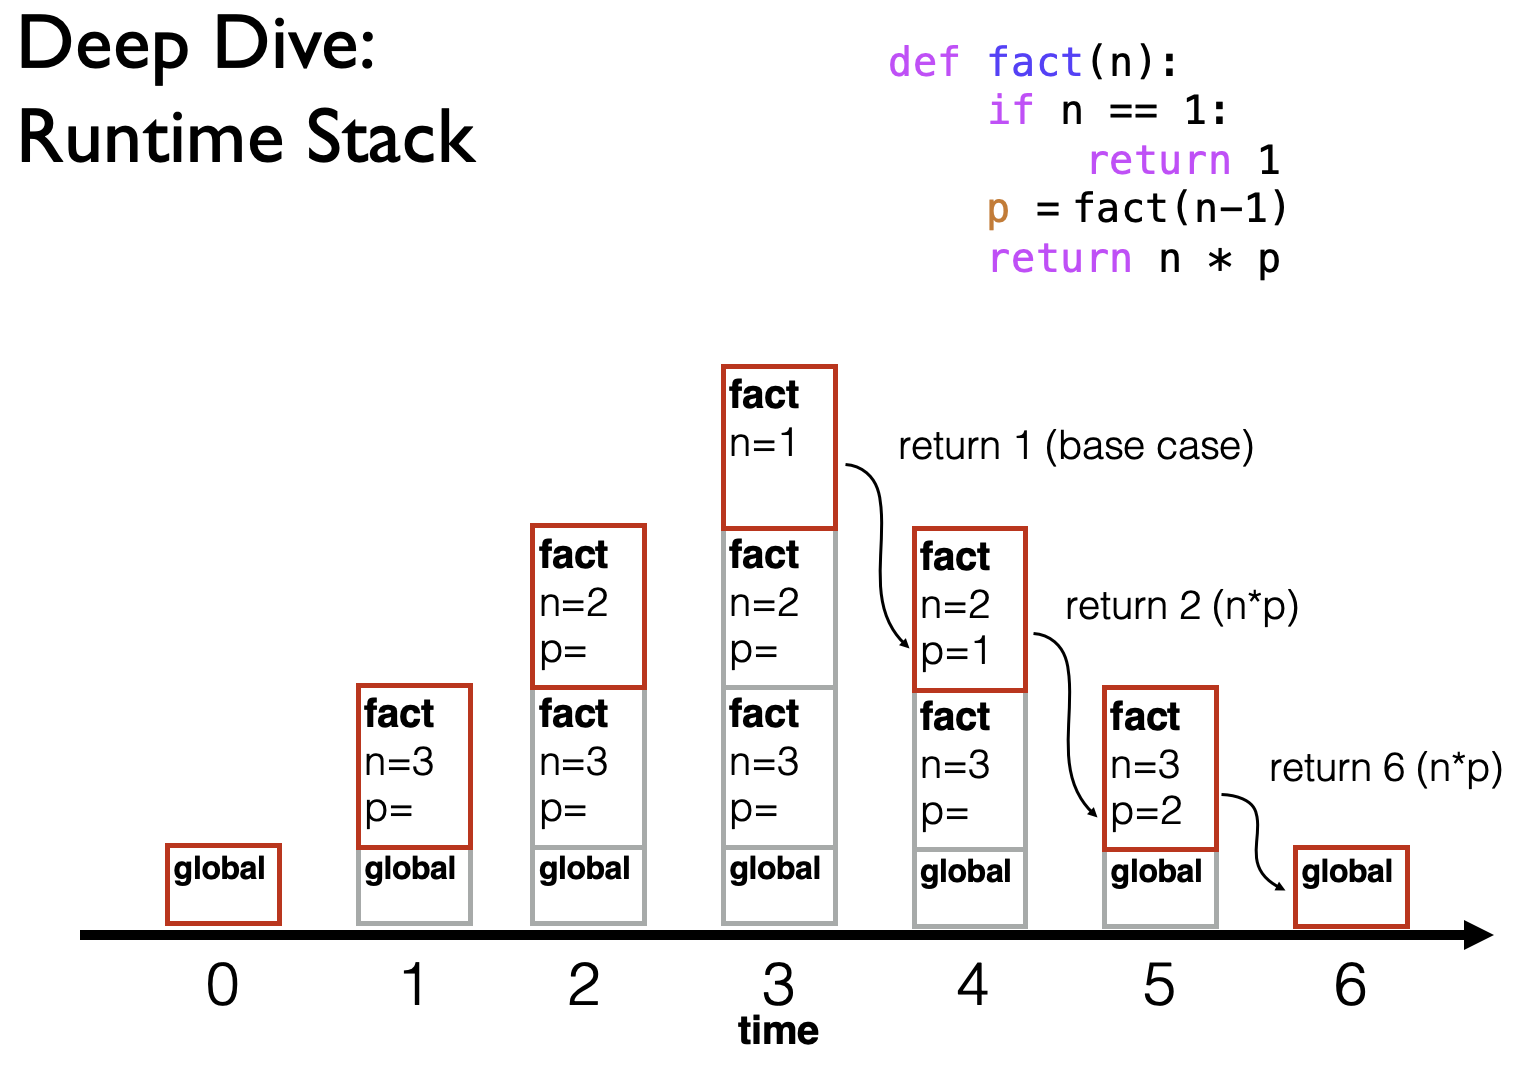
</div> 

### RecursionError

#### If there is no base case what happens in the above example? 
- recursion never ends......infinite recursion

#### infinite recursion can also happen if the recursive case does not move towards the base

In [ ]:
def fact(n):
    #if n == 1:
    #    return 1
    p = fact(n-1)                                   
    return n * p
fact(3)

### Self-check: Tracing example

In [ ]:
# Tracing a recursive function in the Python Tutor
# do this on your own
# Example 1

def foo(n):
    # I always start recursive functions by printing the parameters
    print("Starting foo with n= " , n)
    if n < 0:
        print("base case, returning 100")
        return 100
    else:
        temp = foo(n-2)
        print("Ending foo returning " ,  (n + temp))
        return n + temp

foo(13)

# What happens if we replace < with == ? 

In [ ]:
# Example 2
# The Collatz Conjecture problem 
# https://en.wikipedia.org/wiki/Collatz_conjecture
# run this in Python Tutor on your ownn

def collatz(n):
    # I always start recursive functions by printing the parameters
    print("in collatz with n = " ,  n)
    if n == 1:
        return 1 # base case
    elif n % 2 == 0:
        return collatz(n//2)
    else:
        return collatz (3*n+1)

collatz(13)   # try other numbers


### Trace a recursive function involving nested data structures

In [ ]:
# Write a recursive function to search *ANY* list of lists/tuples 
# for a given word
def search_list_recursive(target, some_list):
    ''' returns True if target in some_list, False otherwise'''
    pass

In [ ]:
fav_stuff = ["apples", "peaches", "oranges", 
             ["A", "B", "C", "D"],
             [["sedan", "SUV car", "minivan"], 
              ["bicycle", "road bike", "scooter"]]
            ]

print(search_list_recursive("apples", fav_stuff))   # outer list
print(search_list_recursive("D", fav_stuff))        # list @ depth 1
print(search_list_recursive("road bike", fav_stuff))# list @ depth 2
print(search_list_recursive("bicycle", fav_stuff))  # list @ depth 2
print(search_list_recursive("pizza", fav_stuff))    # doesn't exist

In [ ]:
def pretty_print(items, indent = 0):
    """
    prints the nested data structure with proper indentation
    """
    pass

#data = ["A", "B", "C"]
data = ["A", ["1", "2", "3",], "B", ["4", ["i", "ii"]]]
pretty_print(data)

### Explain why the following can be recursively defined

- lists
- dictionaries
- JSON objects

### dictionaries can have a recursive structure

In [ ]:
person_info = { "name": "Meena", 
               "age": 250, 
               "family" : {"spouse": "Rogers", 
                           "child1": {"name": "Viyan", 
                                        "age": 2}, 
                          }
              }

In [ ]:
# let's try to search through a deep dictionary. 
def search_dict_recursive(target_key, some_dict):
    ''' returns the Value associated with target_key if tarket_key 
    in any level of some_dict, None otherwise'''
    if target_key in some_dict:  # base case
        return some_dict[target_key]
    else:
        for key in some_dict:
            if type(some_dict[key]) == dict: # recursive case
                 return search_dict_recursive(target_key, \
                                              some_dict[key])        
    return None

print(search_dict_recursive("child1", person_info))
print(search_dict_recursive("father", person_info))